# Plotting 3: Cut-flow When Fixed $\Lambda_d = 5$ GeV and Varying $r_\mathrm{inv}$

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (AutoLocator, MaxNLocator)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

# My Packages
from plotting import plotting

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load Datasets

In [2]:
path_data = '/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/'
dataset_csv = ['status23', 'status71', 'jet', 'met', 'jet_met',
               'n_jet', 'jj', 'jjj', 'jj_met', 'jjj_met']
dataset_npz = ['neutrinos', 'weight']
# fixed Lambdad = 5 and varying rinv = [0, 0.3, 0.6, 1]
rinv = [0, 0.3, 0.6, 1]

# load .csv & .npz into pd.DataFrame() & np.array()
dataset, weight_npz = [], []
for i, r in enumerate(rinv):
    print(f'Dataset {i + 1}: rinv = {r}')
    folder = f'Lambdad5_rinv{int(r * 10)}/'
    file = f'_rinv{int(r * 10)}_Lambdad5'
    print(path_data + folder + file)
    npz = np.load(path_data + folder + 'weight' + file + '_ckkwl.npz', allow_pickle=True)
    weight_npz.append(npz)
    for j, data in enumerate(dataset_csv):
        # print(j, data)
        # print(j, folder + data + file + '_ckkwl.csv')
        df = pd.read_csv(path_data + folder + data + file + '_ckkwl.csv')
        dataset.append(df)
    print('-'*80)

Dataset 1: rinv = 0
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv0/_rinv0_Lambdad5
--------------------------------------------------------------------------------
Dataset 2: rinv = 0.3
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv3/_rinv3_Lambdad5
--------------------------------------------------------------------------------
Dataset 3: rinv = 0.6
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv6/_rinv6_Lambdad5
--------------------------------------------------------------------------------
Dataset 4: rinv = 1
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv10/_rinv10_Lambdad5
--------------------------------------------------------------------------------


In [3]:
# every 10 is a cycle
for j, data in enumerate(dataset_csv):
    print(j, data)

0 status23
1 status71
2 jet
3 met
4 jet_met
5 n_jet
6 jj
7 jjj
8 jj_met
9 jjj_met


### A. Simple check

In [4]:
print(f'{len(dataset)} data in dataset')
print(f'{len(weight_npz)} data in weight_npz')

40 data in dataset
4 data in weight_npz


In [5]:
rinv = [0, 0.3, 0.6, 1]
print('when fixed Lambdad = 5 GeV:')
for i in range(len(weight_npz)):
    print(f"* cross-section of rinv {rinv[i]} = {np.sum(weight_npz[i]['weight_2'] * (10**9))} pb")

when fixed Lambdad = 5 GeV:
* cross-section of rinv 0 = 0.5759936906961745 pb
* cross-section of rinv 0.3 = 0.5777782906857286 pb
* cross-section of rinv 0.6 = 0.5760763608289176 pb
* cross-section of rinv 1 = 0.5740604635582307 pb


## 3. Plot

In [6]:
# * define global parameters

# text
# a. cross-section
text = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
        r'$\Lambda_d = 5$ GeV']
# b.luminosity
text_lum = [r'$\sqrt{s} = 13$ TeV, 139 $\mathrm{fb}^{-1}$', r'$m_{Z^\prime} = 1500$ GeV',
            r'$\Lambda_d = 5$ GeV']
text_xy = (0.05, 0.93)

# selected events
# a. truth level and preselection
selected_all = [np.arange(dataset[i].shape[0]) for i in range(0, len(dataset), 10)]
# b. dijet
selected_jj = [dataset[i+6]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]
# c. trijet
selected_jjj = [dataset[i+7]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]

# weight
weight = [weight_npz[i]['weight_2'] * (10**9) for i in range(len(weight_npz))]
weight_preselection = []
for i, d in enumerate([0, 10, 20, 30]):
    print(f'{i+1}. data {d}')
    d1 = dataset[d+2]['pT_1'].to_numpy()
    w = weight[i]
    weight_preselection.append(w[d1 >= 0])
weight_jj = [weight[i][selected_jj[i]] for i in range(len(weight_npz))]
weight_jjj = [weight[i][selected_jjj[i]] for i in range(len(weight_npz))]

print('*'*80)
# cross-section
xsection = np.array([np.sum(weight[i]) for i in range(len(weight))])
xsection_preselection = np.array([np.sum(weight_preselection[i]) for i in range(len(weight))])
xsection_jj = np.array([np.sum(weight_jj[i]) for i in range(len(weight))])
xsection_jjj = np.array([np.sum(weight_jjj[i]) for i in range(len(weight))])
print(f'------  Cross-section:')
print(f'* Before preselection: cross-section = {xsection} pb')
print(f'* Preselection: cross-section = {xsection_preselection} pb')
print(f'* Dijet: cross-section = {xsection_jj} pb')
print(f'* Trijet: cross-section = {xsection_jjj} pb')

print('-'*60)
# events
# 139 fb^(-1) = 139 pb^(-1) * 1000
luminosity = 139 * 1000
events = np.array([np.sum(weight[i] * luminosity) for i in range(len(weight))])
events_preselection = np.array([np.sum(weight_preselection[i] * luminosity) for i in range(len(weight))])
events_jj = np.array([np.sum(weight_jj[i] * luminosity) for i in range(len(weight))])
events_jjj = np.array([np.sum(weight_jjj[i] * luminosity) for i in range(len(weight))])
print(f'------  Number of events with luminosity = 139 fb^(-1):')
print(f'* Before preselection: number of events = {events}')
print(f'* Preselection: number of events = {events_preselection}')
print(f'* Dijet: number of events = {events_jj}')
print(f'* Trijet: number of events = {events_jjj}')

print('*'*80)
# print the information
rinv = np.array([0, 0.3, 0.6, 1])
for i, r in enumerate(rinv):
    print(f'* rinv = {r}: cross-section = {np.sum(weight[i])} pb')
    print('-'*60)

1. data 0
2. data 10
3. data 20
4. data 30
********************************************************************************
------  Cross-section:
* Before preselection: cross-section = [0.57599369 0.57777829 0.57607636 0.57406046] pb
* Preselection: cross-section = [0.56953733 0.56311376 0.53410838 0.3824147 ] pb
* Dijet: cross-section = [0.54198888 0.50233748 0.42434722 0.18731793] pb
* Trijet: cross-section = [0.45757697 0.38612405 0.27905929 0.07882379] pb
------------------------------------------------------------
------  Number of events with luminosity = 139 fb^(-1):
* Before preselection: number of events = [80063.12300677 80311.18240532 80074.61415522 79794.40443459]
* Preselection: number of events = [79165.68820057 78272.81293073 74241.06452955 53155.64281855]
* Dijet: number of events = [75336.45380148 69824.90933002 58984.26419286 26037.19259376]
* Trijet: number of events = [63603.19877051 53671.24332211 38789.24197011 10956.50714376]
************************************

In [7]:
n = [weight[i].shape[0] for i in range(len(weight))]
n_preselection = [weight_preselection[i].shape[0] for i in range(len(weight))]
n_jj = [weight_jj[i].shape[0] for i in range(len(weight))]
n_jjj = [weight_jjj[i].shape[0] for i in range(len(weight))]

print(f'------  Number of events for simulation:')
print(f'* Before preselection: number of events = {n}')
print(f'* Preselection: number of events = {n_preselection}')
print(f'* Dijet: number of events = {n_jj}')
print(f'* Trijet: number of events = {n_jjj}')

------  Number of events for simulation:
* Before preselection: number of events = [19334, 19373, 19328, 19286]
* Preselection: number of events = [19101, 18847, 17823, 12436]
* Dijet: number of events = [18114, 16706, 13991, 5866]
* Trijet: number of events = [15138, 12689, 9031, 2387]


In [8]:
print(f'preselection weight of rinv [0 0.3 0.6 1] =')
weight_preselection

preselection weight of rinv [0 0.3 0.6 1] =


[array([2.79496343e-05, 2.79496343e-05, 4.13660873e-05, ...,
        2.79496343e-05, 2.79496343e-05, 2.79496343e-05]),
 array([2.79496343e-05, 2.79496343e-05, 4.13660873e-05, ...,
        3.54384524e-05, 2.79496343e-05, 2.79496343e-05]),
 array([2.79496343e-05, 2.79496343e-05, 4.13660873e-05, ...,
        3.98954958e-05, 2.79496343e-05, 2.79496343e-05]),
 array([2.79496343e-05, 3.51214995e-05, 2.79496343e-05, ...,
        2.79496343e-05, 2.79496343e-05, 3.98954958e-05])]

In [9]:
selected_jj

[array([    0,     1,     2, ..., 19331, 19332, 19333]),
 array([    0,     1,     4, ..., 19370, 19371, 19372]),
 array([    1,     2,     3, ..., 19324, 19325, 19326]),
 array([    4,     6,     8, ..., 19271, 19281, 19283])]

In [10]:
rinv

array([0. , 0.3, 0.6, 1. ])

In [11]:
xsection

array([0.57599369, 0.57777829, 0.57607636, 0.57406046])

In [12]:
xsection_preselection

array([0.56953733, 0.56311376, 0.53410838, 0.3824147 ])

In [13]:
xsection_jj

array([0.54198888, 0.50233748, 0.42434722, 0.18731793])

In [14]:
xsection_jjj

array([0.45757697, 0.38612405, 0.27905929, 0.07882379])

### 3-1. Cross-section

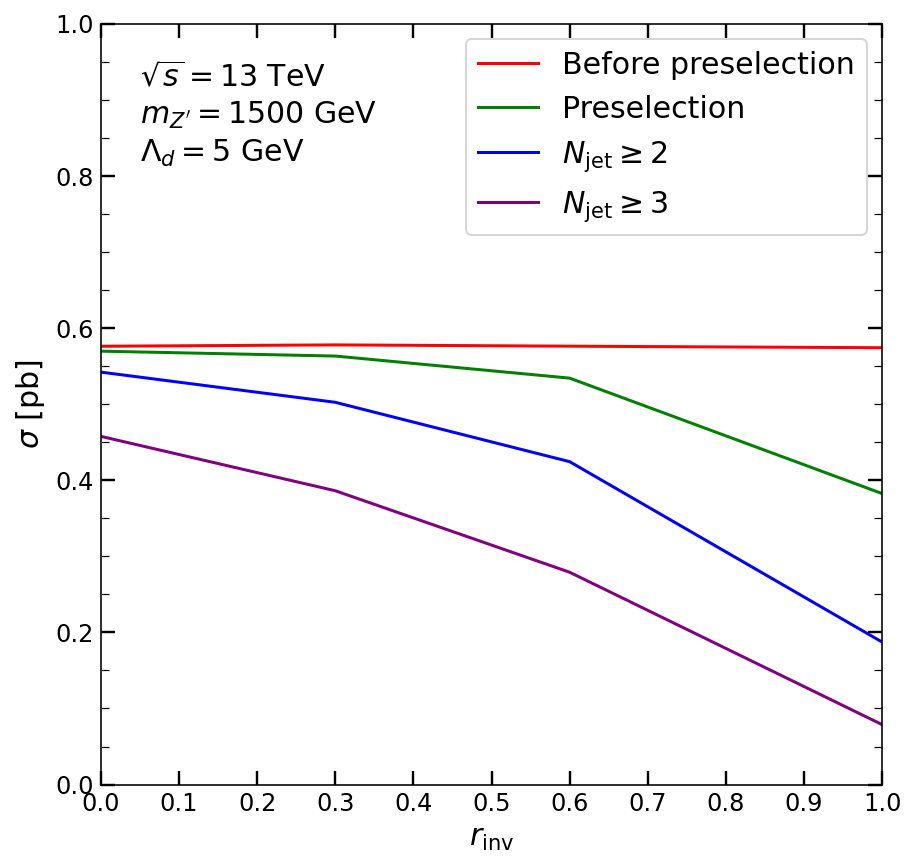

In [15]:
# 1. cross-section
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(rinv, xsection, color='red', label='Before preselection')
ax.plot(rinv, xsection_preselection, color='green', label='Preselection')
ax.plot(rinv, xsection_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(rinv, xsection_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the Axes legend
ax.legend(fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$r_\mathrm{inv}$', fontsize=15)
ax.set_ylabel(r'$\sigma$ [pb]', fontsize=15)

# x- & y-axis view limits
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(AutoLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_01-Ld5_rinv-xsection.pdf')
plt.show()

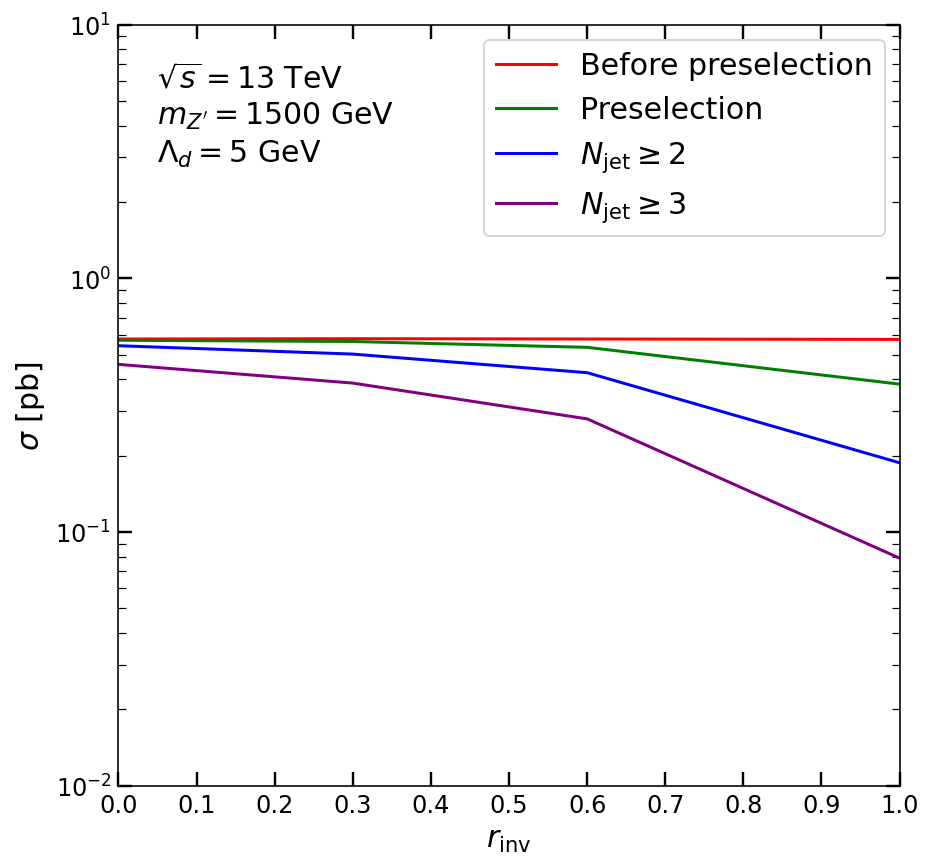

In [16]:
# 2. cross-section with log scale for y-axis
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(rinv, xsection, color='red', label='Before preselection')
ax.plot(rinv, xsection_preselection, color='green', label='Preselection')
ax.plot(rinv, xsection_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(rinv, xsection_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the Axes legend
ax.legend(fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$r_\mathrm{inv}$', fontsize=15)
ax.set_ylabel(r'$\sigma$ [pb]', fontsize=15)

# y-axis scale
ax.set_yscale('log')

# x- & y-axis view limits
ax.set_xlim((0, 1))
ax.set_ylim((1/100, 10))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(LogLocator())
ax.yaxis.set_minor_locator(LogLocator(base=10, subs='auto'))

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_02-Ld5_rinv-xsection-ylog.pdf')
plt.show()

### 3-2. Number of events

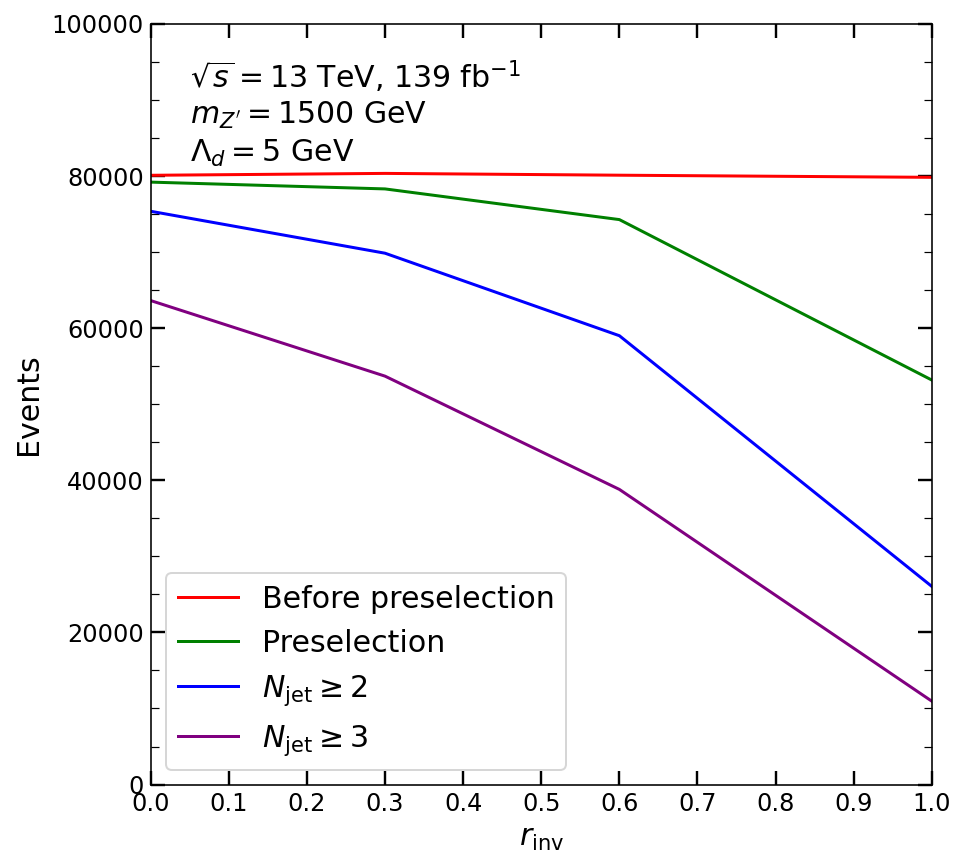

In [17]:
# 3. number of events
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(rinv, events, color='red', label='Before preselection')
ax.plot(rinv, events_preselection, color='green', label='Preselection')
ax.plot(rinv, events_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(rinv, events_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the Axes legend
ax.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$r_\mathrm{inv}$', fontsize=15)
ax.set_ylabel('Events', fontsize=15)

# x- & y-axis view limits
ax.set_xlim((0, 1))
ax.set_ylim((0, 100000))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(AutoLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text_lum):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_03-Ld5_rinv-events.pdf')
plt.show()

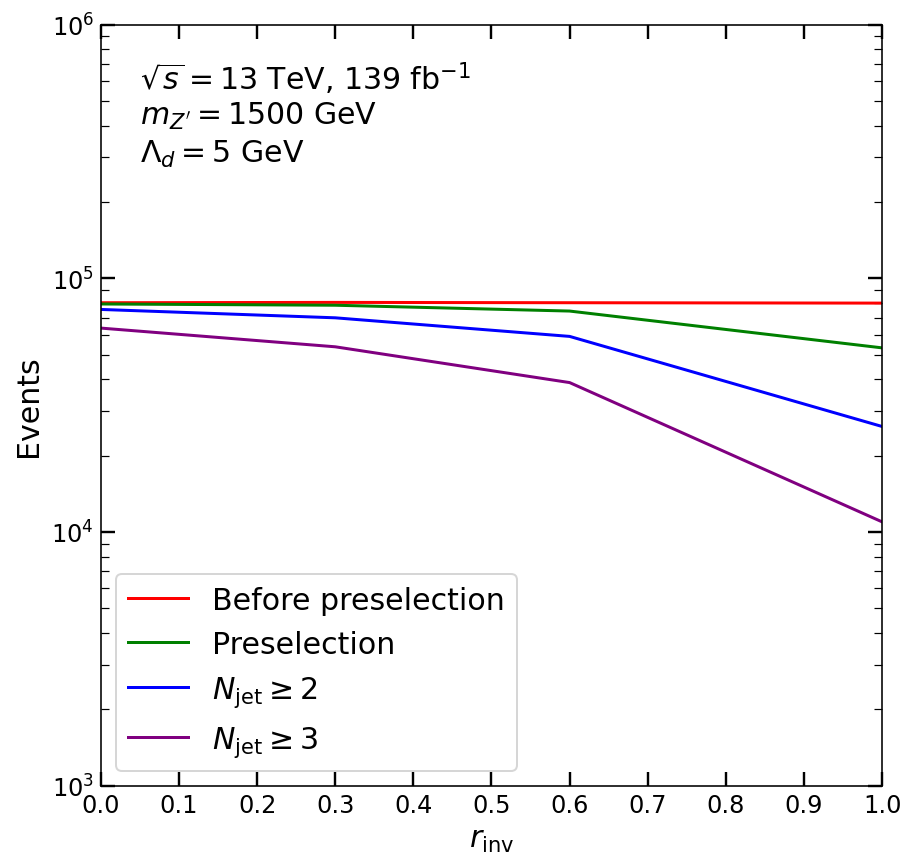

In [18]:
# 4. number of events with log scale for y-axis
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(rinv, events, color='red', label='Before preselection')
ax.plot(rinv, events_preselection, color='green', label='Preselection')
ax.plot(rinv, events_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(rinv, events_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the Axes legend
ax.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$r_\mathrm{inv}$', fontsize=15)
ax.set_ylabel('Events', fontsize=15)

# y-axis scale
ax.set_yscale('log')

# x- & y-axis view limits
ax.set_xlim((0, 1))
ax.set_ylim((1000, 1000000))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(LogLocator())
ax.yaxis.set_minor_locator(LogLocator(base=10, subs='auto'))

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text_lum):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_04-Ld5_rinv-events-ylog.pdf')
plt.show()

## Test

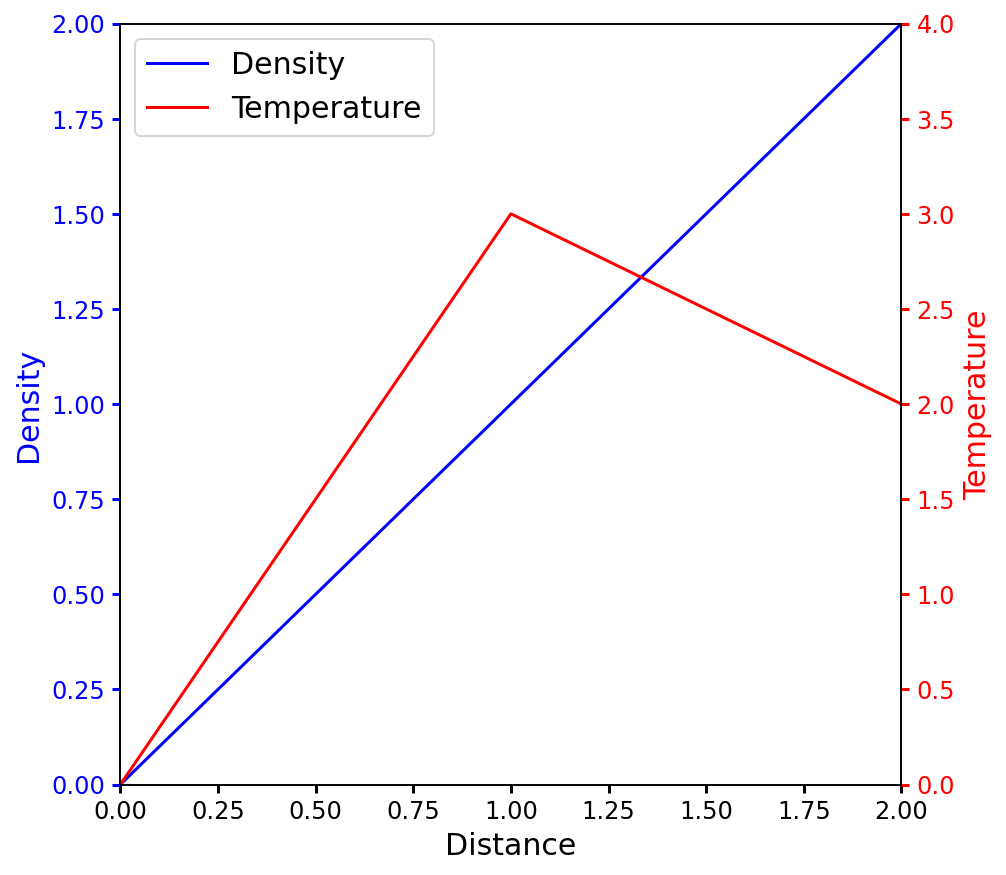

In [19]:
# example 1
fig, ax = plt.subplots(figsize=(7, 7))
# fig.subplots_adjust(right=0.75)  # figure width * 0.75

# create multiple y axes with a shared x axis
twin1 = ax.twinx()

# data
p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")

# the Axes legend
ax.legend(handles=[p1, p2], fontsize=15)

# x-axis & y-axes view limits
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
twin1.set_ylim(0, 4)

# x-axis & y-axes labels
ax.set_xlabel("Distance", fontsize=15)
ax.set_ylabel("Density", fontsize=15)
twin1.set_ylabel("Temperature", fontsize=15)
# label of y-axes color
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

# the appearance of ticks, tick labels, and gridlines of the Axes
tkw = dict(size=4, width=1.5, labelsize=12)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

plt.show()

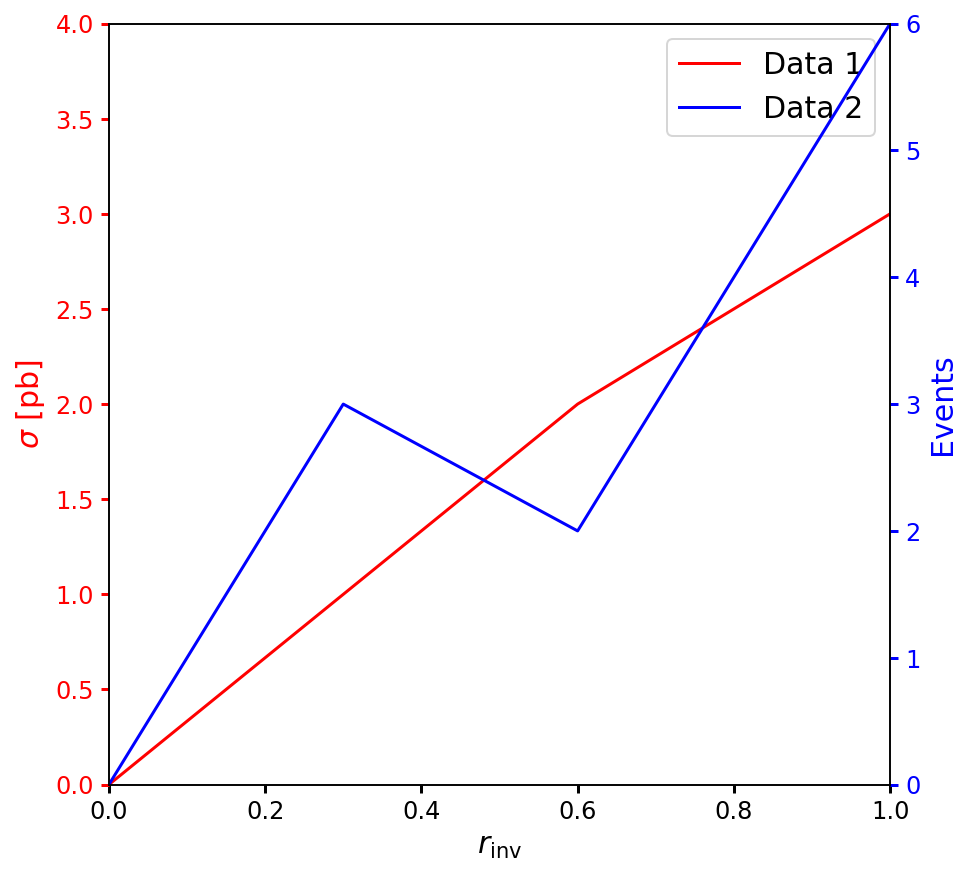

In [20]:
# example 2
fig, ax = plt.subplots(figsize=(7, 7))
# fig.subplots_adjust(right=0.75)  # figure width * 0.75

# create multiple y axes with a shared x axis
twin1 = ax.twinx()

# data
p1, = ax.plot(rinv, [0, 1, 2, 3], "r-", label='Data 1')
p2, = twin1.plot(rinv, [0, 3, 2, 6], "b-", label='Data 2')

# the Axes legend
ax.legend(handles=[p1, p2], fontsize=15)

# x-axis & y-axes view limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 4)
twin1.set_ylim(0, 6)

# x-axis & y-axes labels
ax.set_xlabel(r'$r_\mathrm{inv}$', fontsize=15)
ax.set_ylabel(r'$\sigma$ [pb]', fontsize=15)
twin1.set_ylabel('Events', fontsize=15)
# label of y-axes color
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

# the appearance of ticks, tick labels, and gridlines of the Axes
tkw = dict(size=4, width=1.5, labelsize=12)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

plt.show()

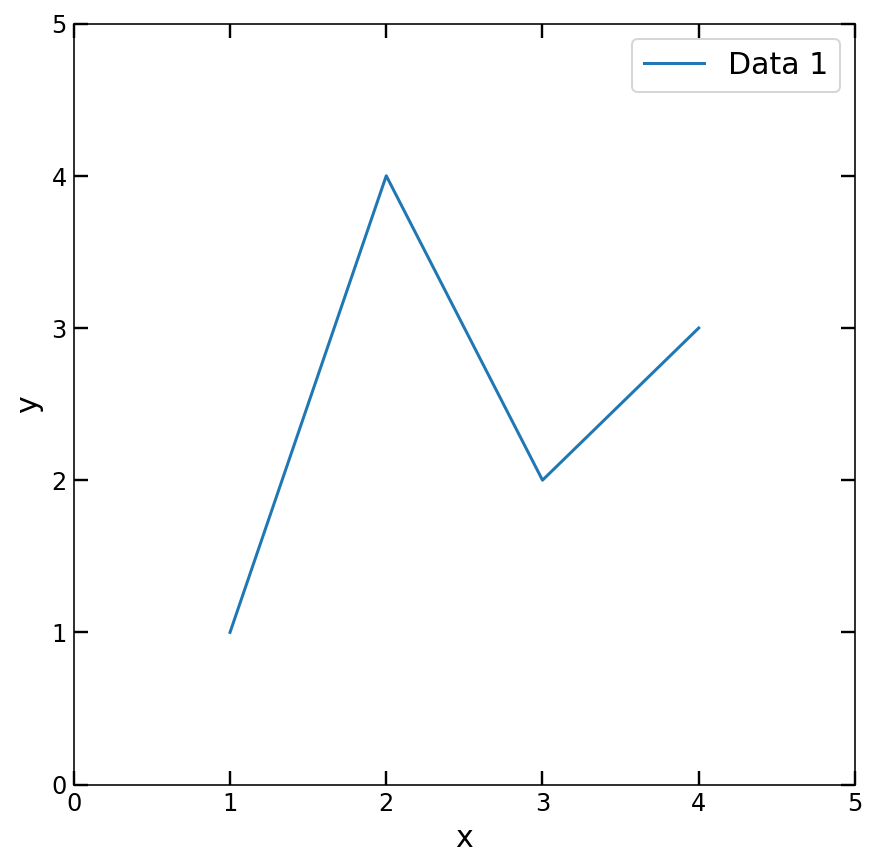

In [21]:
# example 3
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot([1, 2, 3, 4], [1, 4, 2, 3], label='Data 1')

# the Axes legend
ax.legend(fontsize=15)

# x- & y-axis labels
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

# x- & y-axis view limits
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

plt.show()